In [1]:
import os
import librosa.display
import random

In [2]:
from tqdm import tqdm

def load_segmented_files(directory, target_sr=32000):
    wav_files = []
    leak_wav_files = []
    for dir in os.listdir(directory):
        if not os.path.isdir(os.path.join(directory, dir)):
            continue
        for file in tqdm(os.listdir(os.path.join(directory, dir))):
            if not file.endswith(".wav"):
                continue
            file_path = os.path.join(directory, dir, file)
            y, sr = librosa.load(file_path, sr=None, mono=True)
            # print(f"檔案 {file_path} 的取樣率為 {sr}")
            if sr != target_sr:
                y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
            filename = f'{dir}_{file}'
            if 'no-leak' in dir:
                wav_files.append((y, filename))
            else:
                leak_wav_files.append((y, filename))
    print(f"共有 {len(wav_files) + len(leak_wav_files)} 個 wav 檔案，其中 {len(leak_wav_files)} 個有泄漏，{len(wav_files)} 個沒有泄漏")
    return wav_files, leak_wav_files

def shuffle_data(wav_files, leak_wav_files, n_files=None):
    wav_files = random.sample(wav_files, n_files if n_files else len(wav_files))
    leak_wav_files = random.sample(leak_wav_files, n_files if n_files else len(leak_wav_files))

    return wav_files, leak_wav_files


In [3]:
# 載入訓練資料
wav_files, leak_wav_files = load_segmented_files('validate_data/2024-10-29', target_sr=32000)

100%|██████████| 3/3 [00:00<00:00, 31.14it/s]

共有 7 個 wav 檔案，其中 4 個有泄漏，3 個沒有泄漏


In [7]:
from plotting_audio import plot_mel_stft_fft

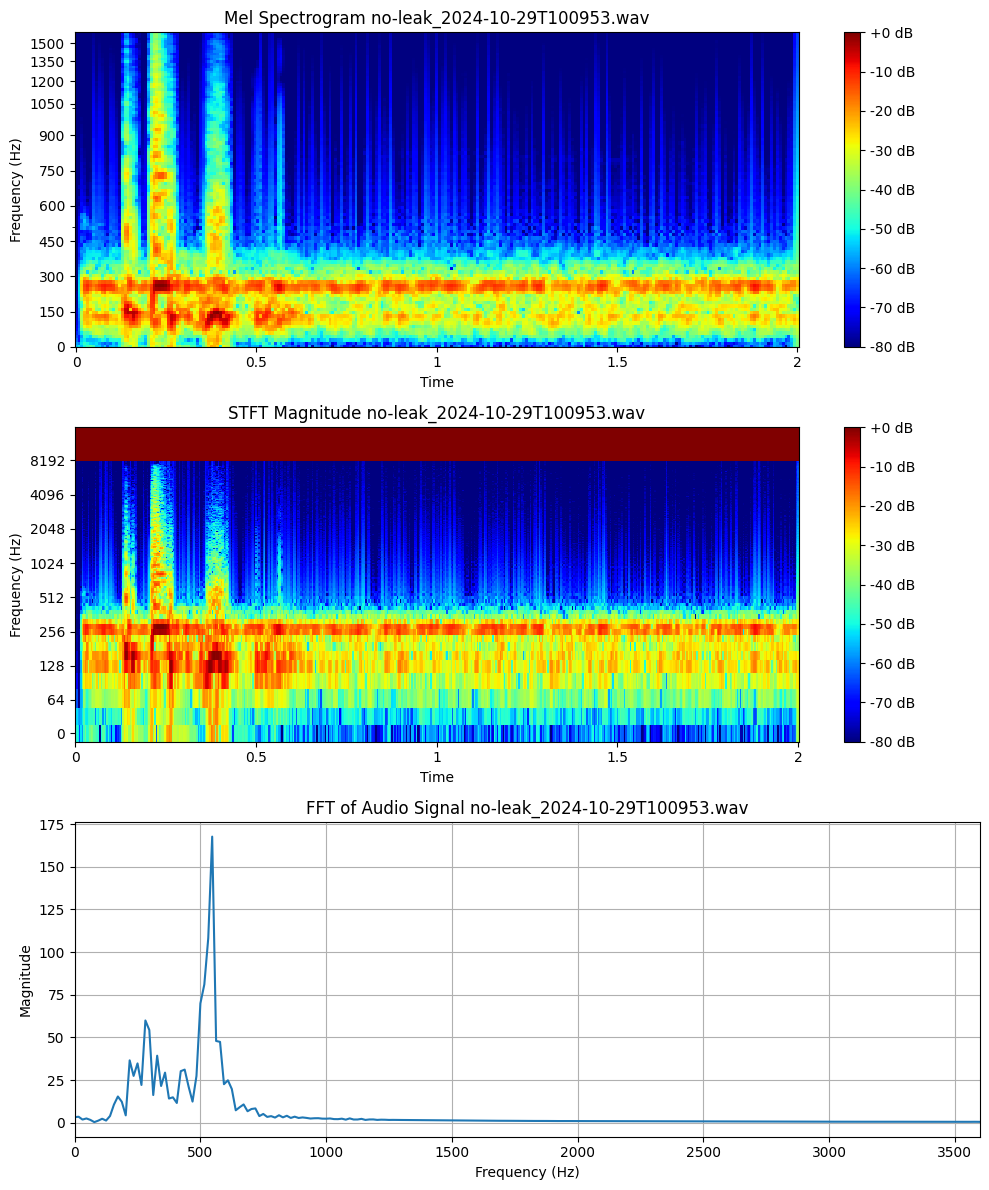

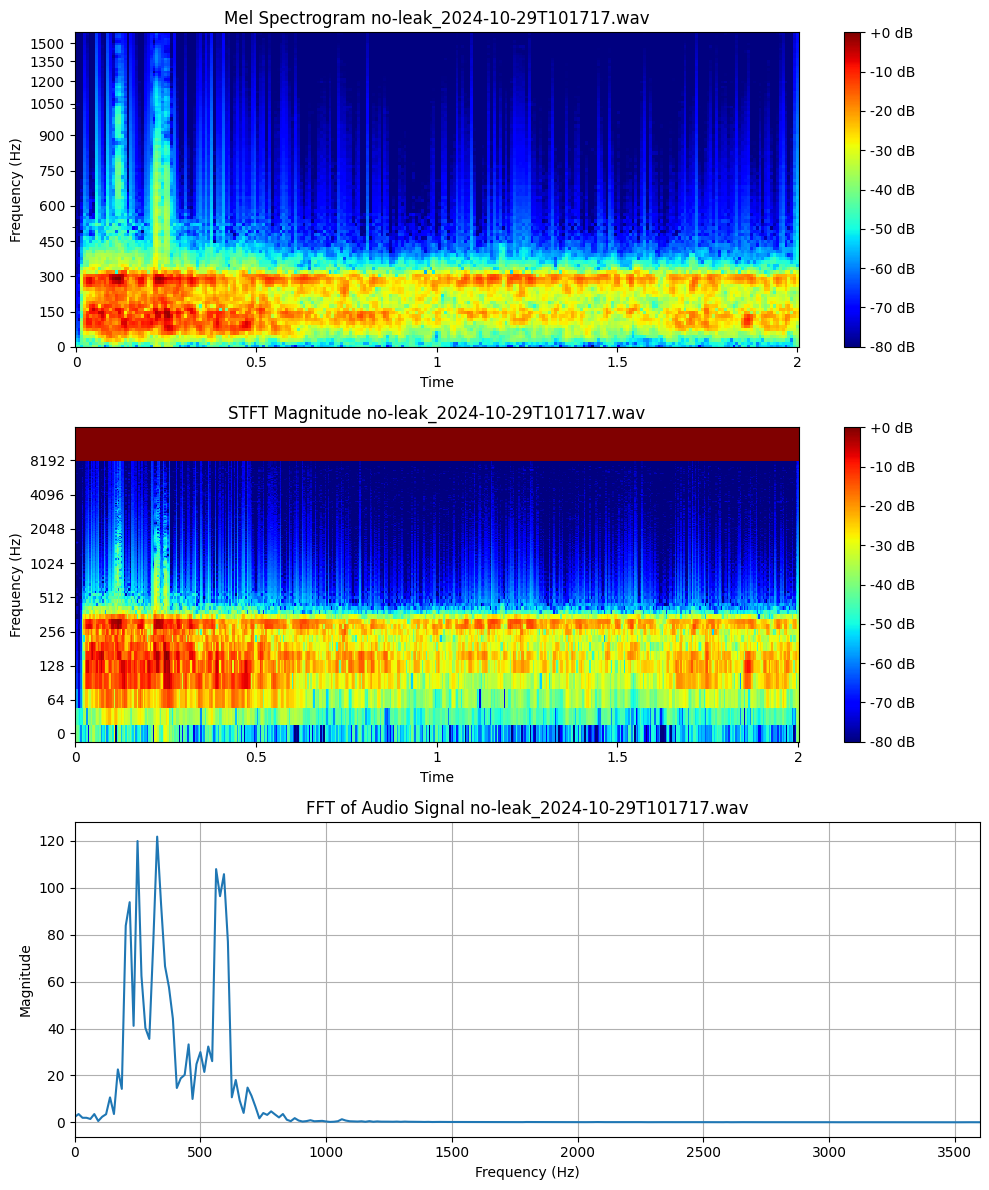

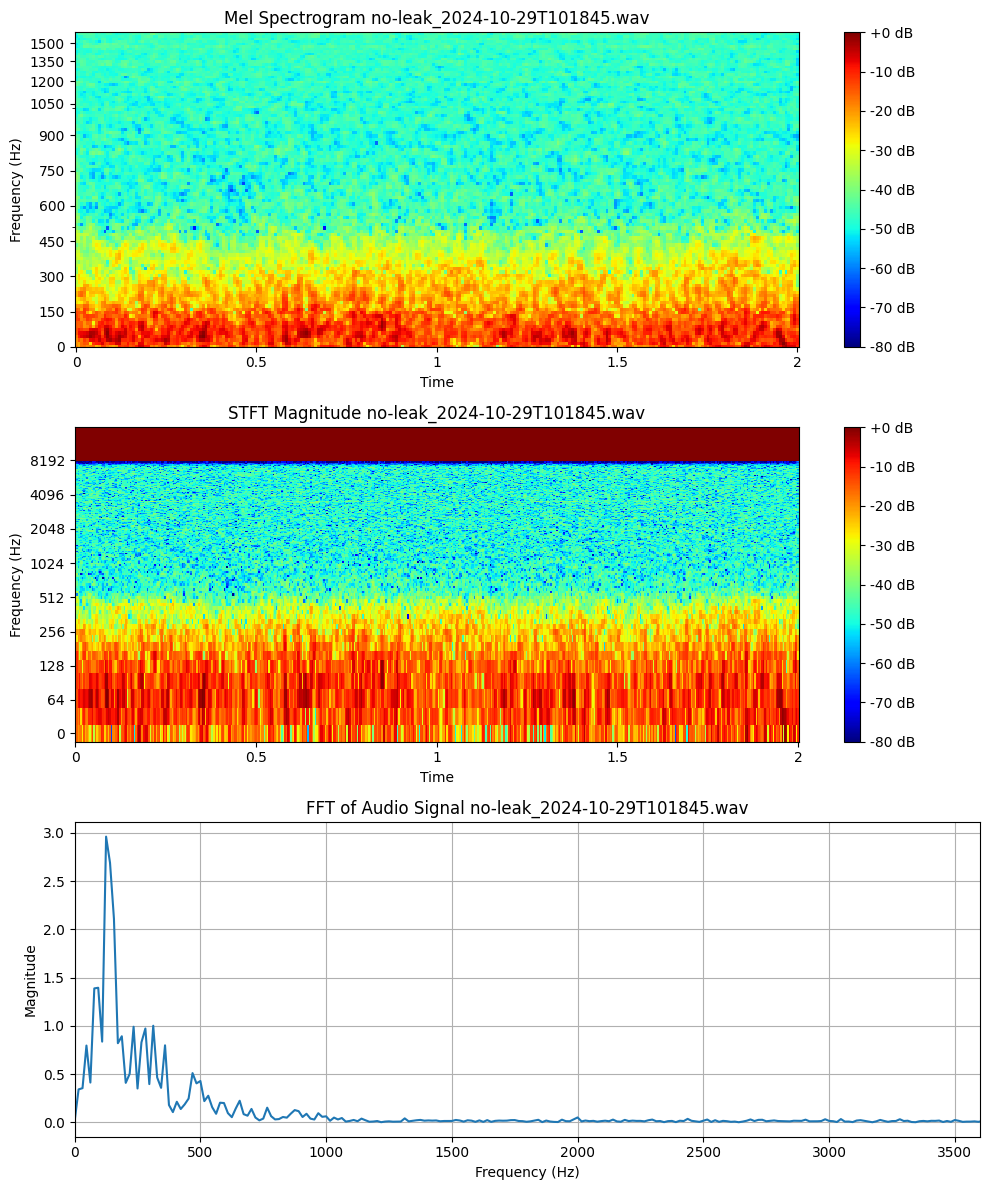

In [8]:
for wav, file_name in wav_files:
    plot_mel_stft_fft(wav, file_name, class_type='no-leak')

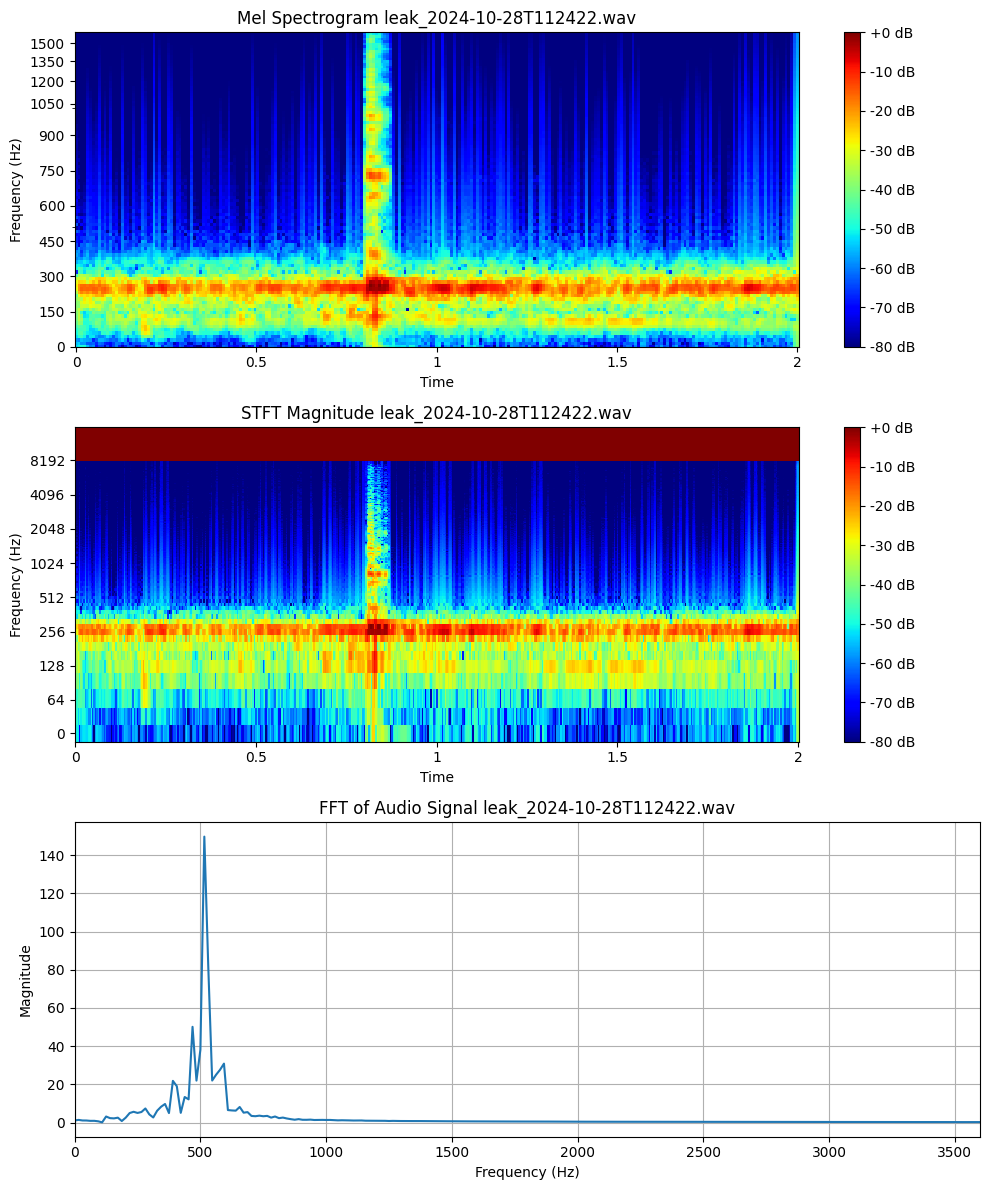

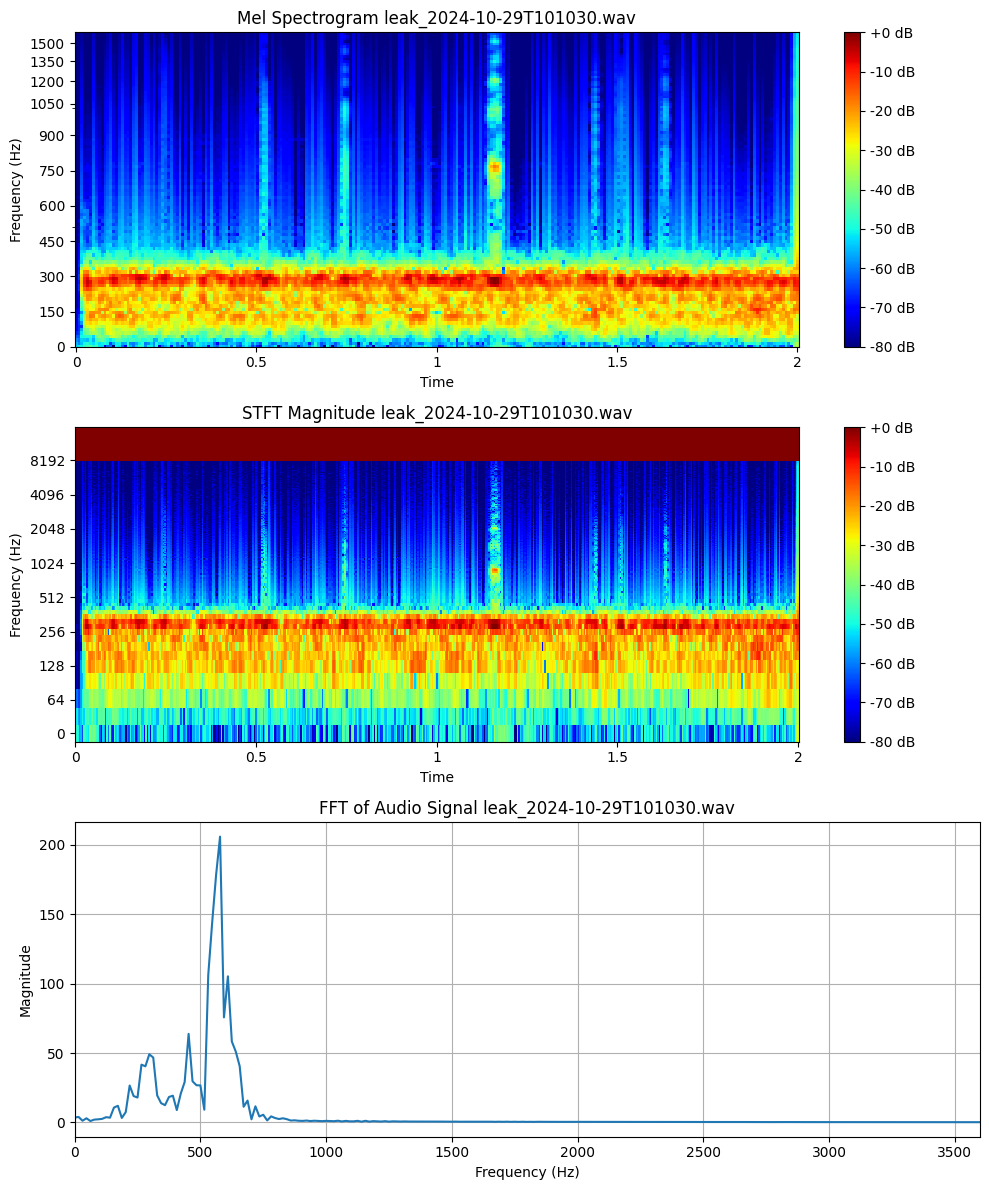

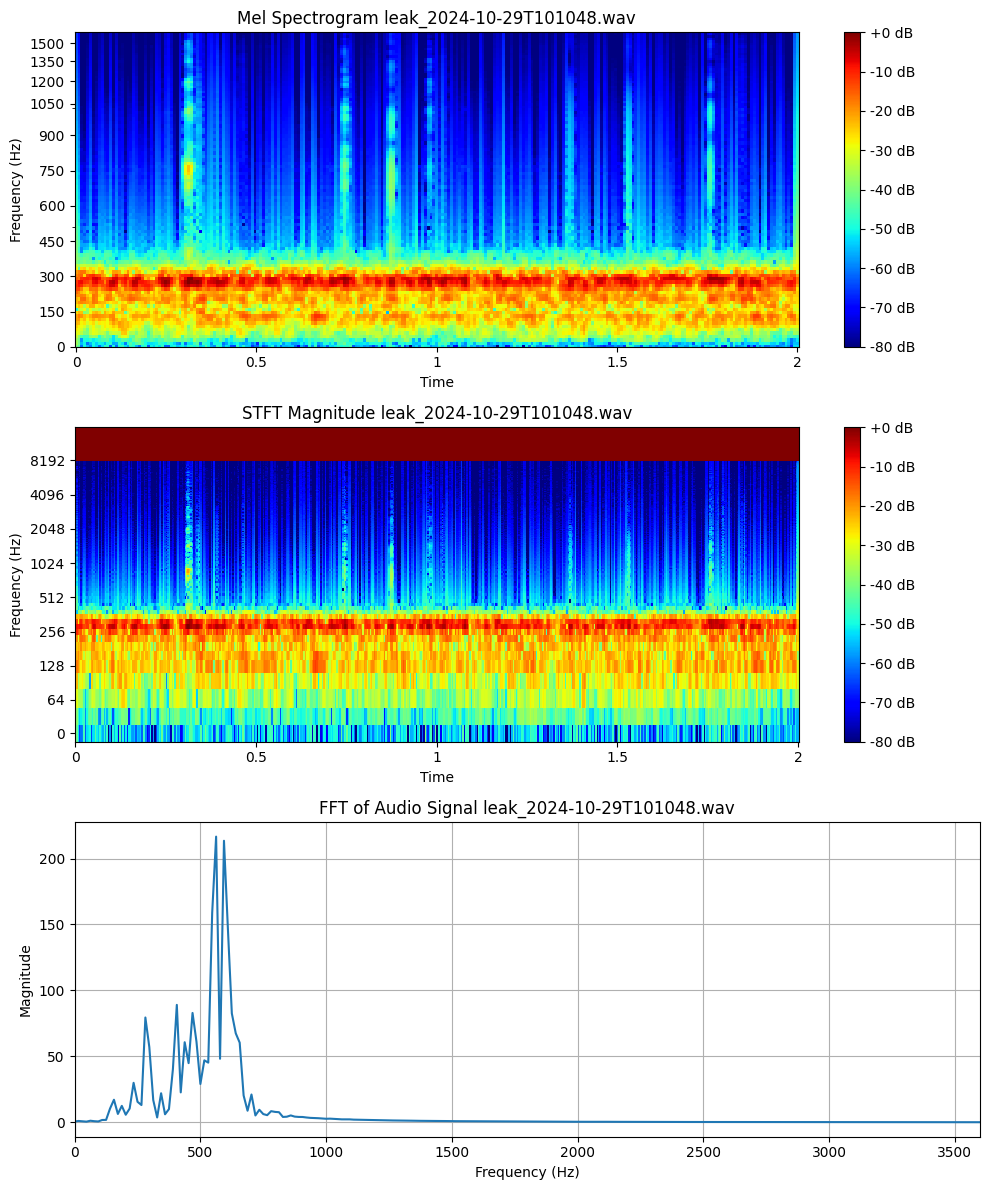

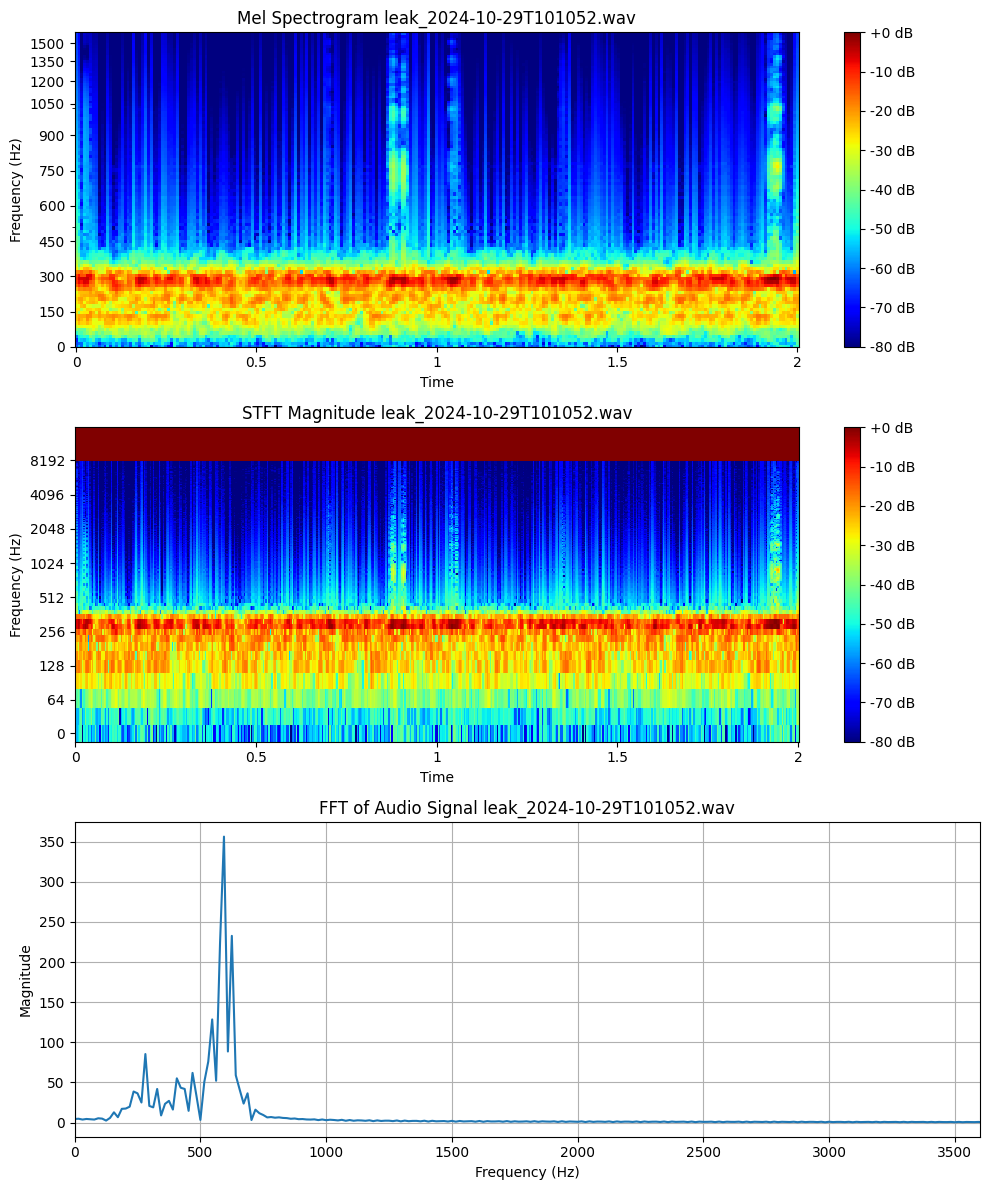

In [6]:
for wav, file_name in leak_wav_files:
    plot_mel_stft_fft(wav, file_name, class_type='leak')